In [1]:
from datetime import datetime 
import pandas as pd
from utils import simulator_period,save_sim_resuls
from subjects.corr_coef import CorrCoeff,TrendFunc
import numpy as np
import matplotlib.pyplot as plt


### Arima troubleshooting

```
! pip install pmdarima
import warnings 
warnings.filterwarnings('ignore')


```

```
!conda install -c conda-forge pmdarima -y
```


In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [3]:
casino_fig=pd.read_csv('casino_fig.csv', parse_dates = ['Date'])
# casino_fig['week_day'] = casino_fig['Date'].dt.dayofweek

In [4]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands
0,2022-01-01,36,2201.722967,56208.538497,4342
1,2022-01-02,11,-164.573991,48039.620299,3836
2,2022-01-03,12,-147.260111,19233.123874,1630
3,2022-01-04,10,1064.457361,61688.730570,1664
4,2022-01-05,16,1601.138453,28191.484771,2257


In [5]:
head_serias = casino_fig[['Date','Heads']]
head_serias

,Date,Heads
0,2022-01-01,36
1,2022-01-02,11
2,2022-01-03,12
3,2022-01-04,10
4,2022-01-05,16
...,...,...
1092,2024-12-28,40
1093,2024-12-29,32
1094,2024-12-30,21
1095,2024-12-31,29


In [6]:
head_serias = head_serias.set_index('Date')


In [7]:
head_serias

,Heads
Date,
2022-01-01,36
2022-01-02,11
2022-01-03,12
2022-01-04,10
2022-01-05,16
...,...
2024-12-28,40
2024-12-29,32
2024-12-30,21


### Разделяем выборку на тест и тренинг

In [8]:
test_size = 28

In [9]:
from sktime.forecasting.model_selection import temporal_train_test_split

head_train, head_test = temporal_train_test_split(head_serias, test_size=test_size)

### Горизонт прогнозирования

In [10]:
fh = np.arange(1, test_size+1)
fh.size


28

### Обучаем Ариму

In [11]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=7,suppress_warnings=True)
forecaster.fit(head_train);



#### Предсказываем

In [12]:
head_pred = forecaster.predict(fh);

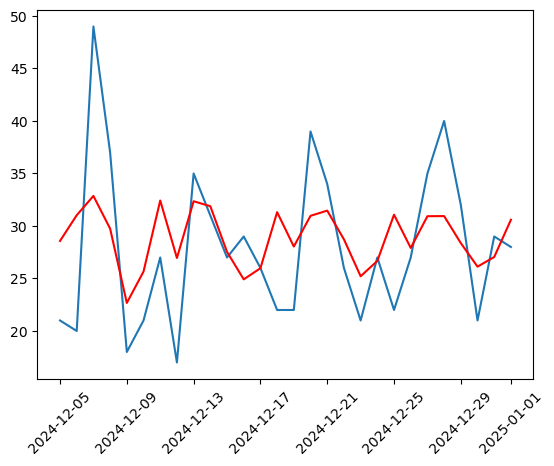

In [13]:
plt.plot(head_test)
plt.plot(head_pred,color = 'red')
plt.tick_params(axis='x', labelrotation=45)

### ETS

In [14]:
from sktime.forecasting.ets import AutoETS

In [15]:
forecaster_ets = AutoETS(auto=True,  n_jobs=-1, sp=7) 
forecaster_ets.fit(head_train) 

/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/l

AutoETS(auto=True, n_jobs=-1, sp=7)

In [16]:
head_pred_ets = forecaster_ets.predict(fh)

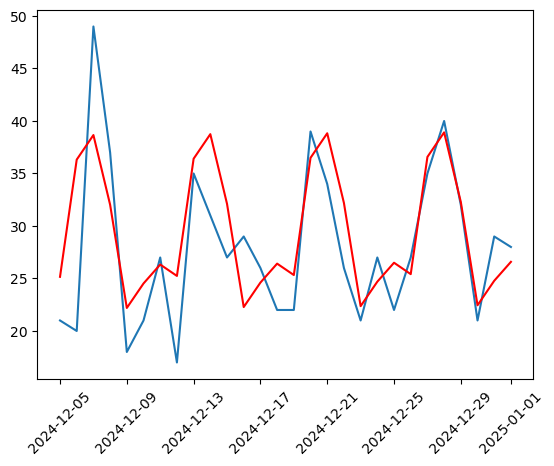

In [17]:
plt.plot(head_test)
plt.plot(head_pred_ets,color = 'red')
plt.tick_params(axis='x', labelrotation=45)